Pre-processing the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df = df.dropna()
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


Identifying outliers

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

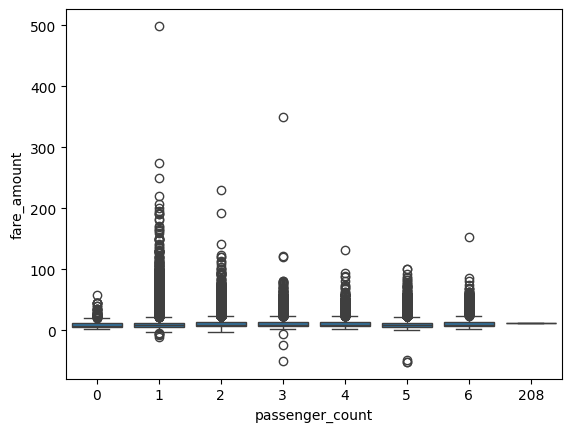

In [6]:
sns.boxplot(x = 'passenger_count', y = 'fare_amount', data=df)

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
def euclidean(lon1, lat1, lon2, lat2):
    dist = (((lon2-lon1)**2)+((lat2-lat1)**2))**(0.5)
    return dist
df['distance'] = euclidean(df['pickup_longitude'], df['dropoff_longitude'], df['pickup_latitude'], df['dropoff_latitude'])
df['distance'] = df['distance'].astype(float).round(2)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,162.25
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,162.26
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,162.27
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,162.31
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,162.21


<Axes: xlabel='distance', ylabel='fare_amount'>

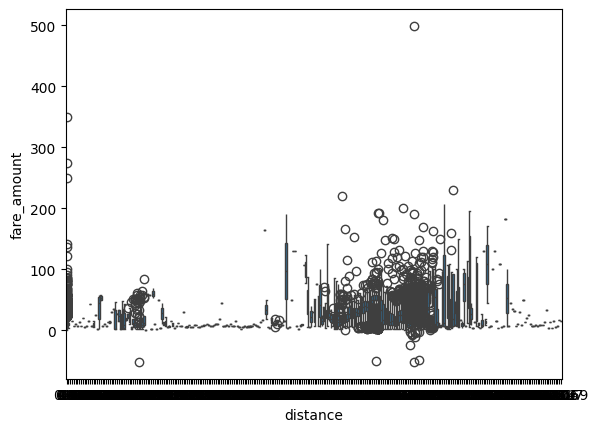

In [7]:
sns.boxplot(x = 'distance', y = 'fare_amount', data=df)

Remove Outliers

In [9]:
iqr1 = df['distance'].quantile(0.75) - df['distance'].quantile(0.25)
upper_bound1 = df['distance'].quantile(0.75) + (1.5 * iqr1)
lower_bound1 = df['distance'].quantile(0.25) - (1.5 * iqr1)
df = df[df['distance'] < upper_bound1]
df = df[df['distance'] > lower_bound1]
iqr2 = df['fare_amount'].quantile(0.75) - df['fare_amount'].quantile(0.25)
upper_bound2 = df['fare_amount'].quantile(0.75) + (1.5 * iqr2)
lower_bound2 = df['fare_amount'].quantile(0.25) - (1.5 * iqr2)
df = df[df['fare_amount'] < upper_bound2]
df = df[df['fare_amount'] > lower_bound2]

<Axes: xlabel='distance', ylabel='fare_amount'>

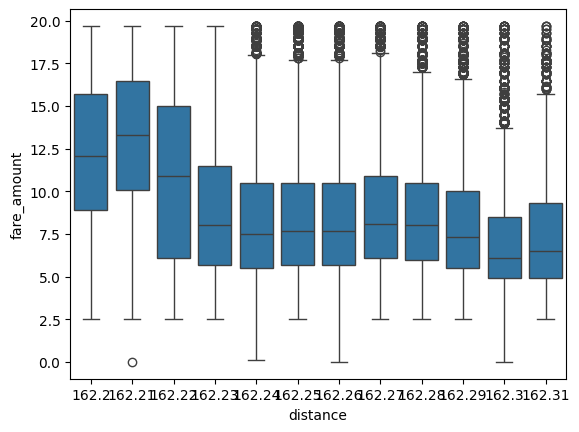

In [10]:
sns.boxplot(x = 'distance', y = 'fare_amount', data=df)

Linear Regression

In [11]:
#Preprocessing the Data Using Standard Scaler in range of -1 to 1
x = df['distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable
std = StandardScaler()
Y = std.fit_transform(y)
X = std.fit_transform(x)
#Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(Y_test)

print('Predicted Values:')
print(Y_pred)

# Calculate the R2 score for the linear regression model
r2_score_linear = r2_score(Y_test, Y_pred)

# Calculate the RMSE score for the linear regression model
rmse_score_linear = mean_squared_error(Y_test, Y_pred)**0.5

# Print the evaluation scores
print('Linear regression:')
print('R2 score:', r2_score_linear)
print('RMSE score:', rmse_score_linear)

Predicted Values:
[[ 0.0210824 ]
 [-0.29273717]
 [ 0.05526077]
 ...
 [ 0.06768927]
 [ 0.08011776]
 [ 0.00554678]]
Linear regression:
R2 score: -0.24517386646174355
RMSE score: 1.116234684868723


Random Forest Regression

In [14]:
# Create the random forest regression model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

print('Predicted Values:')
print(Y_pred)

# Calculate the R2 score for the random forest regression model
r2_score_random_forest = r2_score(Y_test, Y_pred)

# Calculate the RMSE score for the random forest regression model
rmse_score_random_forest = mean_squared_error(Y_test, Y_pred)**0.5

# Print the evaluation scores
print('Random forest regression:')
print('R2 score:', r2_score_random_forest)
print('RMSE score:', rmse_score_random_forest)

c:\Users\fierb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Predicted Values:
[-0.00772221  1.15154643 -0.02540158 ... -0.04367073 -0.02540158
 -0.04367073]
Random forest regression:
R2 score: 0.039222237794241166
RMSE score: 0.9805099065745241
